# Social Distancing Simulation

The model consists of a graph, with students as nodes and edges as relationships between students. There is a 2x2 normal form game that occurs once on each edge, where the actions for each player are {socially distance, not socially distance}.

In [33]:
import matplotlib.pyplot as plt
from network import Network
from evaluator import Evaluator
import networkx as nx
from networkx.algorithms import centrality
import importlib
import numpy as np

In [16]:
network = Network(10, 300)

In [17]:
g = network.generate_network()

In [18]:
network.get_node_attrs(5)

{'senior': True, 'ic': False, 'icf': False}

In [19]:
evaluator = Evaluator({'close': 50, 'friend': 10}, {'close': 10, 'friend': 5}, .5, 1, network)

In [20]:
evaluator.virus_disutility(2)

-61.550000000000004

In [7]:
g.edges()

EdgeView([(0, 12), (0, 20), (0, 24), (0, 27), (0, 42), (0, 53), (0, 195), (0, 249), (0, 253), (0, 300), (0, 356), (0, 373), (0, 580), (0, 597), (0, 775), (0, 896), (0, 900), (0, 929), (0, 939), (0, 941), (1, 16), (1, 47), (1, 59), (1, 71), (1, 162), (1, 198), (1, 246), (1, 429), (1, 457), (1, 785), (2, 19), (2, 34), (2, 40), (2, 45), (2, 133), (2, 155), (2, 219), (2, 284), (2, 293), (2, 324), (2, 376), (2, 386), (2, 431), (2, 599), (2, 618), (2, 631), (2, 648), (2, 729), (2, 743), (2, 766), (2, 778), (2, 796), (2, 913), (2, 948), (2, 964), (2, 993), (3, 25), (3, 41), (3, 48), (3, 49), (3, 56), (3, 88), (3, 91), (3, 131), (3, 140), (3, 144), (3, 151), (3, 267), (3, 302), (3, 310), (3, 332), (3, 387), (3, 455), (3, 886), (4, 10), (4, 14), (4, 78), (4, 107), (4, 118), (4, 132), (4, 189), (4, 197), (4, 271), (4, 287), (4, 297), (4, 316), (4, 331), (4, 417), (4, 428), (4, 672), (4, 739), (4, 834), (4, 969), (5, 23), (5, 33), (5, 64), (5, 68), (5, 73), (5, 93), (5, 103), (5, 135), (5, 203), 

In [21]:
outcomes = {0: 0, 1: 0}
for edge in g.edges():
    outcomes[evaluator.get_pure_nash_idx(evaluator.generate_payoff_matrix(edge[0], edge[1]), 2)] += 1

In [22]:
outcomes

{0: 780, 1: 61}

In [37]:
def get_percent_meeting_up():
    percent_meeting_up = []
    for rho in np.arange(0, 1., .1):
        evaluator = Evaluator({'close': 50, 'friend': 10}, {'close': 10, 'friend': 5}, rho, 1, network)
        outcomes = {0: 0, 1: 0}
        for edge in g.edges():
            outcomes[evaluator.get_pure_nash_idx(evaluator.generate_payoff_matrix(edge[0], edge[1]), 2)] += 1
        percent_meeting_up.append(outcomes[1] / g.number_of_edges())
    return percent_meeting_up

In [38]:
np.arange(0, 1., .1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [39]:
percent_meeting_up = get_percent_meeting_up()

In [50]:
def plot_rho_vs_ne(percent_meeting_up):
    plt.plot(np.arange(0, 1., .1), percent_meeting_up)
    plt.title("Fraction Choosing to Meet Up Over Rho")
    plt.xlabel("Rho")
    plt.ylabel("Fraction of Agents who Choose to Meet")
    plt.savefig("plots/percent_meet_up_vs_rho_g" + str(g.number_of_nodes()))
    plt.show()

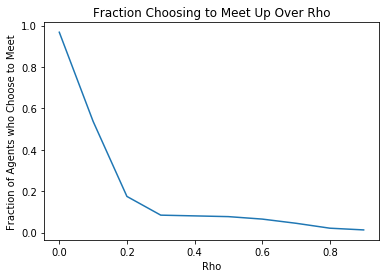

In [51]:
plot_rho_vs_ne(percent_meeting_up)

In [ ]:
count = 0
for key in nx.get_node_attributes(g, 'ic'):
    if nx.get_node_attributes(g, 'ic')[key] == 1:
        count +=1
print(count)

In [ ]:
deg_cent = centrality.degree_centrality(g)
for node in deg_cent:
    print(deg_cent[node] * g.number_of_nodes())

In [ ]:
nx.draw(g)
plt.draw()

In [ ]:
g_test = nx.Graph()
g_test.add_node(1, senior=True)

In [ ]:
g_test.nodes()